In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.ticker as plticker
import math
from sklearn.model_selection import train_test_split
#classifer is more appropriate for binary outout (RandomForestRegressor gives a range)
#one hot encoding will convert column strings to binaries
#make dummies pandas is a function that will do one hot encoding
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.classifier import classification_report

In [2]:
df_dec = pd.read_csv('COVID_Cases_Restricted_Detailed_12042020.csv')
df_dec.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years


In [3]:
death_df = df_dec.loc[(df_dec['death_yn'] == 'Yes') | (df_dec['death_yn'] == 'No')]
death_df.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,...,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
49,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years
55,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
56,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Yes,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
58,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years


In [4]:
death_df_No_Unknowns = death_df.loc[(df_dec['race_ethnicity_combined'] != 'NaN') & (df_dec['race_ethnicity_combined'] != 'Unknown') & (df_dec['race_ethnicity_combined'] != 'Missing')& (df_dec['race_ethnicity_combined'].notna())]
death_df_No_Unknowns.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
66,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-24,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
67,"Black, Non-Hispanic",Laboratory-confirmed case,2020-06-03,Female,2020-06-02,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
68,"Black, Non-Hispanic",Laboratory-confirmed case,2020-11-08,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
69,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-09,Female,2020-09-08,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
70,"Black, Non-Hispanic",Laboratory-confirmed case,2020-07-13,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years


In [ ]:
#combine unknown values (Nan or Unknown or missing race & other columns) into one column

In [5]:
death_df_No_Unknowns['hosp_yn'].value_counts()

No         1893563
Yes         289359
Missing     286030
Unknown     145245
Name: hosp_yn, dtype: int64

In [6]:
death_df_clean = death_df

In [7]:
death_df_clean.columns

Index(['race_ethnicity_combined', 'current_status', 'cdc_report_dt', 'sex',
       'onset_dt', 'pos_spec_dt', 'hosp_yn', 'icu_yn', 'death_yn',
       'hc_work_yn', 'pna_yn', 'abxchest_yn', 'acuterespdistress_yn',
       'mechvent_yn', 'fever_yn', 'sfever_yn', 'chills_yn', 'myalgia_yn',
       'runnose_yn', 'sthroat_yn', 'cough_yn', 'sob_yn', 'nauseavomit_yn',
       'headache_yn', 'abdom_yn', 'diarrhea_yn', 'medcond_yn',
       'county_fips_code', 'res_county', 'res_state', 'age_group'],
      dtype='object')

In [8]:
death_df_clean['sex'].value_counts()

Female     2015378
Male       1806169
Unknown      10100
Missing       3784
Other            5
Name: sex, dtype: int64

In [9]:
death_df_clean.loc[(death_df_clean['sex'] == 'Unknown') | (death_df_clean['sex'] == 'Missing') | (death_df_clean['sex'] == 'Other'),'sex'] = 'undefined'
death_df_clean['sex'].fillna('undefined', inplace=True)
death_df_clean['sex'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Female       2015378
Male         1806169
undefined      52843
Name: sex, dtype: int64

In [10]:
death_df_clean_columns = death_df_clean.columns

In [11]:
death_df_clean['death_yn'].value_counts()

No     3690813
Yes     183577
Name: death_yn, dtype: int64

In [12]:
death_df_clean.loc[(death_df_clean['hosp_yn'] == 'Unknown') | (death_df_clean['hosp_yn'] == 'Missing') | (death_df_clean['hosp_yn'] == 'Other'),'hosp_yn'] = 'undefined'
death_df_clean['hosp_yn'].fillna('undefined', inplace=True)
death_df_clean['hosp_yn'].value_counts()

No           2696186
undefined     796880
Yes           381324
Name: hosp_yn, dtype: int64

In [13]:
death_df_clean.loc[(death_df_clean['icu_yn'] == 'Unknown') | (death_df_clean['icu_yn'] == 'Missing') | (death_df_clean['icu_yn'] == 'Other'),'icu_yn'] = 'undefined'
death_df_clean['icu_yn'].fillna('undefined', inplace=True)
death_df_clean['icu_yn'].value_counts()

undefined    3141125
No            686465
Yes            46800
Name: icu_yn, dtype: int64

In [14]:
death_df_clean.loc[(death_df_clean['hc_work_yn'] == 'Unknown') | (death_df_clean['hc_work_yn'] == 'Missing') | (death_df_clean['hc_work_yn'] == 'Other'),'hc_work_yn'] = 'undefined'
death_df_clean['hc_work_yn'].fillna('undefined', inplace=True)
death_df_clean['hc_work_yn'].value_counts()

undefined    2500290
No           1234992
Yes           139108
Name: hc_work_yn, dtype: int64

In [15]:
death_df_clean.loc[(death_df_clean['pna_yn'] == 'Unknown') | (death_df_clean['pna_yn'] == 'Missing') | (death_df_clean['pna_yn'] == 'Other'),'pna_yn'] = 'undefined'
death_df_clean['pna_yn'].fillna('undefined', inplace=True)
death_df_clean['pna_yn'].value_counts()

undefined    3115831
No            703102
Yes            55457
Name: pna_yn, dtype: int64

In [16]:
death_df_clean.loc[(death_df_clean['abxchest_yn'] == 'Unknown') | (death_df_clean['abxchest_yn'] == 'Missing') | (death_df_clean['abxchest_yn'] == 'Other'),'abxchest_yn'] = 'undefined'
death_df_clean['abxchest_yn'].fillna('undefined', inplace=True)
death_df_clean['abxchest_yn'].value_counts()

undefined    3524989
No            313402
Yes            35999
Name: abxchest_yn, dtype: int64

In [17]:
death_df_clean.loc[(death_df_clean['acuterespdistress_yn'] == 'Unknown') | (death_df_clean['acuterespdistress_yn'] == 'Missing') | (death_df_clean['acuterespdistress_yn'] == 'Other'),'acuterespdistress_yn'] = 'undefined'
death_df_clean['acuterespdistress_yn'].fillna('undefined', inplace=True)
death_df_clean['acuterespdistress_yn'].value_counts()

undefined    3140873
No            717748
Yes            15769
Name: acuterespdistress_yn, dtype: int64

In [18]:
death_df_clean.loc[(death_df_clean['mechvent_yn'] == 'Unknown') | (death_df_clean['mechvent_yn'] == 'Missing') | (death_df_clean['mechvent_yn'] == 'Other'),'mechvent_yn'] = 'undefined'
death_df_clean['mechvent_yn'].fillna('undefined', inplace=True)
death_df_clean['mechvent_yn'].value_counts()

undefined    3246216
No            605825
Yes            22349
Name: mechvent_yn, dtype: int64

In [19]:
death_df_clean.loc[(death_df_clean['fever_yn'] == 'Unknown') | (death_df_clean['fever_yn'] == 'Missing') | (death_df_clean['fever_yn'] == 'Other'),'fever_yn'] = 'undefined'
death_df_clean['fever_yn'].fillna('undefined', inplace=True)
death_df_clean['fever_yn'].value_counts()

undefined    3066253
No            476984
Yes           331153
Name: fever_yn, dtype: int64

In [20]:
death_df_clean.loc[(death_df_clean['sfever_yn'] == 'Unknown') | (death_df_clean['sfever_yn'] == 'Missing') | (death_df_clean['sfever_yn'] == 'Other'),'sfever_yn'] = 'undefined'
death_df_clean['sfever_yn'].fillna('undefined', inplace=True)
death_df_clean['sfever_yn'].value_counts()

undefined    3109619
No            467469
Yes           297302
Name: sfever_yn, dtype: int64

In [21]:
death_df_clean.loc[(death_df_clean['chills_yn'] == 'Unknown') | (death_df_clean['chills_yn'] == 'Missing') | (death_df_clean['chills_yn'] == 'Other'),'chills_yn'] = 'undefined'
death_df_clean['chills_yn'].fillna('undefined', inplace=True)
death_df_clean['chills_yn'].value_counts()

undefined    2977107
No            551359
Yes           345924
Name: chills_yn, dtype: int64

In [22]:
death_df_clean.loc[(death_df_clean['myalgia_yn'] == 'Unknown') | (death_df_clean['myalgia_yn'] == 'Missing') | (death_df_clean['myalgia_yn'] == 'Other'),'myalgia_yn'] = 'undefined'
death_df_clean['myalgia_yn'].fillna('undefined', inplace=True)
death_df_clean['myalgia_yn'].value_counts()

undefined    2929322
Yes           484327
No            460741
Name: myalgia_yn, dtype: int64

In [23]:
death_df_clean.loc[(death_df_clean['runnose_yn'] == 'Unknown') | (death_df_clean['runnose_yn'] == 'Missing') | (death_df_clean['runnose_yn'] == 'Other'),'runnose_yn'] = 'undefined'
death_df_clean['runnose_yn'].fillna('undefined', inplace=True)
death_df_clean['runnose_yn'].value_counts()

undefined    3367502
No            311490
Yes           195398
Name: runnose_yn, dtype: int64

In [24]:
death_df_clean.loc[(death_df_clean['sthroat_yn'] == 'Unknown') | (death_df_clean['sthroat_yn'] == 'Missing') | (death_df_clean['sthroat_yn'] == 'Other'),'sthroat_yn'] = 'undefined'
death_df_clean['sthroat_yn'].fillna('undefined', inplace=True)
death_df_clean['sthroat_yn'].value_counts()

undefined    2965309
No            593270
Yes           315811
Name: sthroat_yn, dtype: int64

In [25]:
death_df_clean.loc[(death_df_clean['cough_yn'] == 'Unknown') | (death_df_clean['cough_yn'] == 'Missing') | (death_df_clean['cough_yn'] == 'Other'),'cough_yn'] = 'undefined'
death_df_clean['cough_yn'].fillna('undefined', inplace=True)
death_df_clean['cough_yn'].value_counts()

undefined    2883187
Yes           596691
No            394512
Name: cough_yn, dtype: int64

In [26]:
death_df_clean.loc[(death_df_clean['sob_yn'] == 'Unknown') | (death_df_clean['sob_yn'] == 'Missing') | (death_df_clean['sob_yn'] == 'Other'),'sob_yn'] = 'undefined'
death_df_clean['sob_yn'].fillna('undefined', inplace=True)
death_df_clean['sob_yn'].value_counts()

undefined    2951764
No            659385
Yes           263241
Name: sob_yn, dtype: int64

In [27]:
death_df_clean.loc[(death_df_clean['nauseavomit_yn'] == 'Unknown') | (death_df_clean['nauseavomit_yn'] == 'Missing') | (death_df_clean['nauseavomit_yn'] == 'Other'),'nauseavomit_yn'] = 'undefined'
death_df_clean['nauseavomit_yn'].fillna('undefined', inplace=True)
death_df_clean['nauseavomit_yn'].value_counts()

undefined    2967746
No            752022
Yes           154622
Name: nauseavomit_yn, dtype: int64

In [28]:
death_df_clean.loc[(death_df_clean['headache_yn'] == 'Unknown') | (death_df_clean['headache_yn'] == 'Missing') | (death_df_clean['headache_yn'] == 'Other'),'headache_yn'] = 'undefined'
death_df_clean['headache_yn'].fillna('undefined', inplace=True)
death_df_clean['headache_yn'].value_counts()

undefined    2922447
Yes           532574
No            419369
Name: headache_yn, dtype: int64

In [29]:
death_df_clean.loc[(death_df_clean['abdom_yn'] == 'Unknown') | (death_df_clean['abdom_yn'] == 'Missing') | (death_df_clean['abdom_yn'] == 'Other'),'abdom_yn'] = 'undefined'
death_df_clean['abdom_yn'].fillna('undefined', inplace=True)
death_df_clean['abdom_yn'].value_counts()

undefined    3216782
No            575846
Yes            81762
Name: abdom_yn, dtype: int64

In [30]:
death_df_clean.loc[(death_df_clean['diarrhea_yn'] == 'Unknown') | (death_df_clean['diarrhea_yn'] == 'Missing') | (death_df_clean['diarrhea_yn'] == 'Other'),'diarrhea_yn'] = 'undefined'
death_df_clean['diarrhea_yn'].fillna('undefined', inplace=True)
death_df_clean['diarrhea_yn'].value_counts()

undefined    2971446
No            659523
Yes           243421
Name: diarrhea_yn, dtype: int64

In [31]:
death_df_clean.loc[(death_df_clean['medcond_yn'] == 'Unknown') | (death_df_clean['medcond_yn'] == 'Missing') | (death_df_clean['medcond_yn'] == 'Other'),'medcond_yn'] = 'undefined'
death_df_clean['medcond_yn'].fillna('undefined', inplace=True)
death_df_clean['medcond_yn'].value_counts()

undefined    2749014
No            565623
Yes           559753
Name: medcond_yn, dtype: int64

In [32]:
death_df_clean.loc[(death_df_clean['age_group'] == 'Unknown') | (death_df_clean['age_group'] == 'Missing') | (death_df_clean['age_group'] == 'Other'),'age_group'] = 'undefined'
death_df_clean['age_group'].fillna('undefined', inplace=True)
death_df_clean['age_group'].value_counts()

20 - 29 Years    726624
30 - 39 Years    614933
40 - 49 Years    571290
50 - 59 Years    553352
60 - 69 Years    399616
10 - 19 Years    391678
70 - 79 Years    239628
80+ Years        209028
0 - 9 Years      144751
undefined         23490
Name: age_group, dtype: int64

In [33]:
#one hot encoding
death_df_clean_dummy = pd.get_dummies(death_df_clean[['death_yn','race_ethnicity_combined','age_group','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn']],dummy_na=False)
death_df_clean_dummy.head()

,death_yn_No,death_yn_Yes,"race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic","race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Hispanic/Latino,race_ethnicity_combined_Missing,"race_ethnicity_combined_Multiple/Other, Non-Hispanic","race_ethnicity_combined_Native Hawaiian/Other Pacific Islander, Non-Hispanic",race_ethnicity_combined_Unknown,...,headache_yn_undefined,abdom_yn_No,abdom_yn_Yes,abdom_yn_undefined,diarrhea_yn_No,diarrhea_yn_Yes,diarrhea_yn_undefined,medcond_yn_No,medcond_yn_Yes,medcond_yn_undefined
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
49,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
55,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
56,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
58,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [34]:
deaths_array = death_df_clean_dummy['death_yn_Yes']
other_data = death_df_clean_dummy.iloc[:,2:]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(other_data, deaths_array, test_size = 0.2, random_state = 42
)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


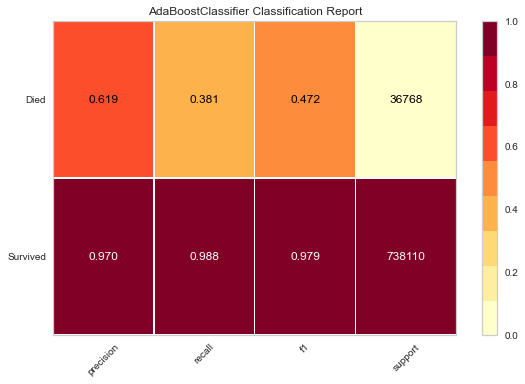

In [88]:
classes = ["Survived","Died"]
ABC_1 = AdaBoostClassifier(n_estimators=25,random_state=0).fit(X_train, y_train)
_ = classification_report(ABC_1, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


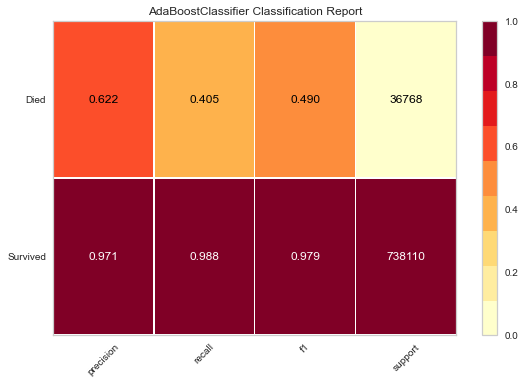

In [89]:
classes = ["Survived","Died"]
ABC_2 = AdaBoostClassifier(n_estimators=50,random_state=0).fit(X_train, y_train)
_ = classification_report(ABC_2, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


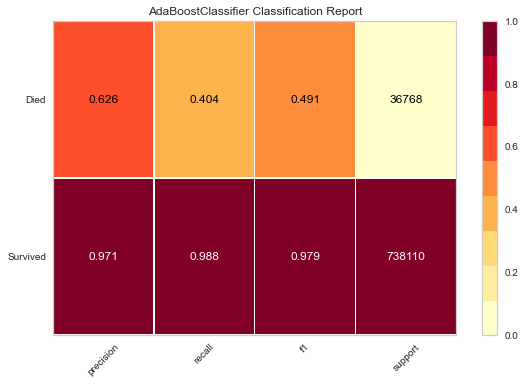

In [91]:
classes = ["Survived","Died"]
ABC_3 = AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)
_ = classification_report(ABC_3, X_test, y_test, classes=classes, support=True, is_fitted=True)

In [36]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


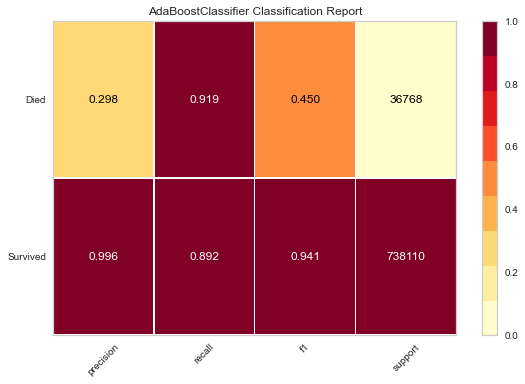

In [95]:
classes = ["Survived","Died"]
ABC_1_ros = AdaBoostClassifier(n_estimators=25,random_state=0).fit(X_train_resampled, y_train_resampled)
_ = classification_report(ABC_1_ros, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


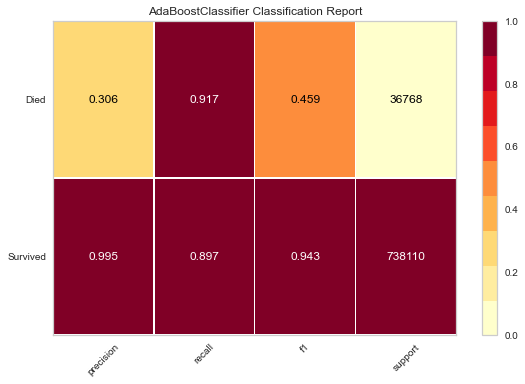

In [96]:
classes = ["Survived","Died"]
ABC_2_ros = AdaBoostClassifier(n_estimators=50,random_state=0).fit(X_train_resampled, y_train_resampled)
_ = classification_report(ABC_2_ros, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


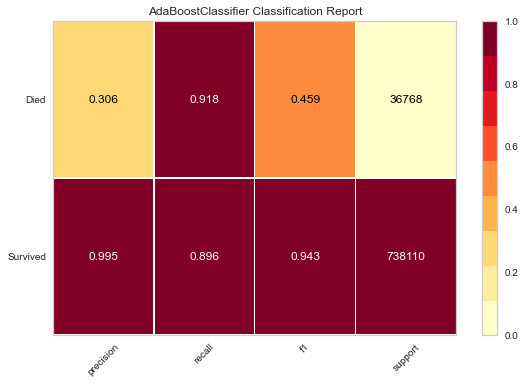

In [97]:
classes = ["Survived","Died"]
ABC_3_ros = AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train_resampled, y_train_resampled)
_ = classification_report(ABC_3_ros, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


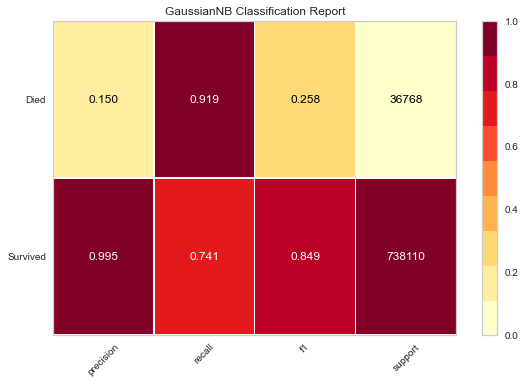

In [39]:
from sklearn.naive_bayes import GaussianNB
GausNB = GaussianNB()
classes = ["Survived","Died"]
GausNB.fit(X_train_resampled, y_train_resampled)
_ = classification_report(GausNB, X_test, y_test, classes=classes, support=True, is_fitted=True)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('clf', GaussianNB())
])

parameters = {
    'clf__priors': [None],
    'clf__var_smoothing': [0.00000001, 0.00000001, 0.0000001]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = cv.predict(X_test)

In [46]:
cv.cv_results_

{'mean_fit_time': array([18.83115115, 18.21692643, 18.31193471]),
 'std_fit_time': array([5.35456256, 2.58273784, 4.77626173]),
 'mean_score_time': array([3.07642279, 3.1336359 , 3.17120857]),
 'std_score_time': array([0.09389471, 0.0618848 , 0.34502432]),
 'param_clf__priors': masked_array(data=[None, None, None],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__var_smoothing': masked_array(data=[1e-08, 1e-08, 1e-07],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__priors': None, 'clf__var_smoothing': 1e-08},
  {'clf__priors': None, 'clf__var_smoothing': 1e-08},
  {'clf__priors': None, 'clf__var_smoothing': 1e-07}],
 'split0_test_score': array([0.82943945, 0.82943945, 0.82943945]),
 'split1_test_score': array([0.82932161, 0.82932161, 0.82932161]),
 'split2_test_score': array([0.82877635, 0.82877635, 0.82877635]),
 'split3_test_score': array([0.82871878, 0.82871878

In [ ]:
from sklearn.svm import SVC
SVC_Model = SVC(kernel='linear')
SVC_Model.fit(X_train_resampled, y_train_resampled)
_ = classification_report(GausNB, X_test, y_test, classes=classes, support=True, is_fitted=True)